In [8]:
# Importation
# Link: https://medium.com/@kedarkunte.kk/end-to-end-data-science-project-time-series-analysis-for-temperature-forecasting-using-arima-cc30bb91e23b
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', delimiter=',')
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [15]:
df_Germany = df.drop('AverageTemperatureUncertainty', axis=1)
df_Germany = df_Germany[df_Germany.Country == "Germany"]
df_Germany = df_Germany.drop('Country',axis=1)
df_Germany.index = pd.to_datetime(df_Germany.dt)
  
#df_Germany = df_Germany.drop('dt', axis=1)
df_Germany.describe()

,AverageTemperature
count,3166.000000
mean,8.152496
std,6.913427
min,-9.298000
25%,2.173500
50%,8.041500
75%,14.713500
max,22.343000


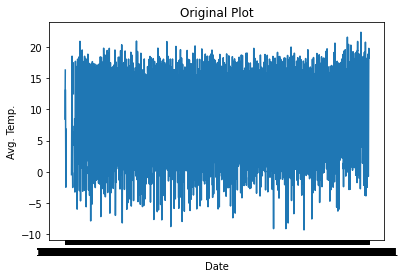

In [18]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot(df_Germany.dt, df_Germany.AverageTemperature)

In [21]:
import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_Germany.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

In [22]:
predictions = results_MA.predict('01/01/1970', '12/01/2023')

NameError: name 'results_MA' is not defined